# Descriptive Statistics

In [1]:
# importing the libaries to use in this analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# setting the viewing of columns to a maximum of 500 columns
pd.set_option('display.max_columns',500)

In [3]:
# reading our data and assigning it to a variable called df
df = pd.read_excel('Raw Data.xlsx')

Our first task is to understand how the hazard has been distributed across the different roles performing the tasks. We, therefore, prune our data to remain only with the columns we require i.e the roles column and the hazards column.

In [4]:
#prunning the data
role_vs_hazard = pd.concat([df['Role'],df.iloc[:,24:39]],axis = 1)

For us to get a better understanding of the hazard, and get meaningful insights, we have to convert them from qualitative into quantitative data. This will enable us to get the mean, probability of occurrence, and other meaningful statistics. We replace the occurrence of a hazard in a Task with 1 from 'x' and non-occurrence with 0 from blank.

In [5]:
#converting the hazard data into quantitative data
for column in role_vs_hazard.columns[1:]:
    role_vs_hazard[column] = role_vs_hazard[column].str.replace('x','1').astype('float') 
    role_vs_hazard[column] = role_vs_hazard[column].fillna(0)
    role_vs_hazard[column] = role_vs_hazard[column].astype('int')

In [6]:
# dropped 4 ows which did not have a role specified
role_vs_hazard.dropna(inplace = True)

Below is the descriptive statistics of the hazards. Taking Difficult Access as a demonstration, the count shows the number of times it could have appeared, i.e the number of tasks. The mean shows its probability of appearing in any task. The two statistics are the most relevant for us to decipher.

In [7]:
stats = role_vs_hazard.describe().sort_values(by = ['mean'],axis = 1,ascending = False)
stats

,Difficult Access,Awkward Posture / Ergonomics,No Hazards Identified,Noisy Conditions,Manual Handing,Vibration,Inadequate procedures,Repetitive,Working underneath rollingstock,Lifting/movement of heavy components,Chemicals,Moveable vehicles,Sustained,Stored energy,Working at Heights
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.385113,0.365696,0.258900,0.216828,0.190939,0.181230,0.177994,0.119741,0.119741,0.113269,0.097087,0.090615,0.087379,0.061489,0.022654
std,0.487411,0.482406,0.438741,0.412753,0.393678,0.385833,0.383128,0.325185,0.325185,0.317435,0.296557,0.287526,0.282847,0.240614,0.149038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Plotting the distribution of hazard, we get to see that 'Difficult Access' and 'Awkward Posture' are the most rampant hazards and therefore priority in finding mitigating measures should be given to the two. It is a relief to see that 'No hazards identified' in tasks is more probable than the rest of the hazards.

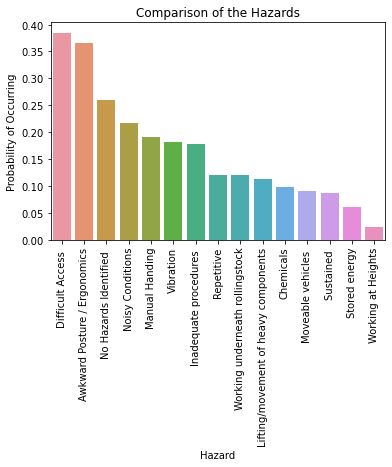

In [8]:
# Plotting the hazard
fig,ax = plt.subplots()
sns.barplot(x = stats.columns,y = stats.loc['mean'])
ax.set_xlabel('Hazard')
ax.set_ylabel('Probability of Occurring')
ax.set_title('Comparison of the Hazards')
plt.xticks(rotation = 90);

Second step is to get an understanding of how the roles have been distributed across the tasks. We note that most tasks fall under the EM/MM role

In [9]:
roles = pd.DataFrame(role_vs_hazard['Role'].value_counts())
roles

,Role
EM/MM,219
MM,59
EM,29
Supervisor,1
Drivers,1


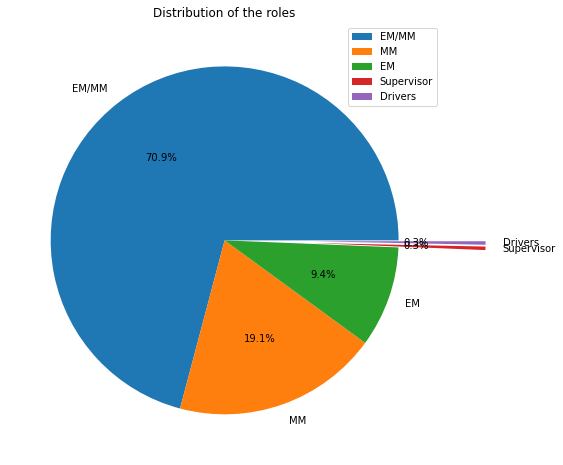

In [10]:
fig,ax = plt.subplots(figsize = (8,8))
ax.pie(roles['Role'],labels = roles.index,explode = [0,0,0,0.5,0.5], autopct = '%1.1f%%')
plt.legend()
ax.set_title('Distribution of the roles');

Lastly we see how different roles experience different hazards while performing their tasks and to what extent. The table below and the heatmap shows how this distribution looks like. 

In [11]:
distribution = role_vs_hazard.groupby(['Role'])[role_vs_hazard.columns[1:]].sum()
distribution

,Difficult Access,Awkward Posture / Ergonomics,Vibration,Repetitive,Sustained,Manual Handing,Working at Heights,Working underneath rollingstock,Stored energy,Lifting/movement of heavy components,Inadequate procedures,Chemicals,Moveable vehicles,Noisy Conditions,No Hazards Identified
Role,,,,,,,,,,,,,,,
Drivers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EM,12,10,2,0,2,6,1,2,4,1,8,1,0,3,2
EM/MM,87,68,33,12,7,38,6,34,11,26,37,25,20,46,73
MM,20,35,21,25,18,15,0,1,4,8,10,4,8,18,5
Supervisor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


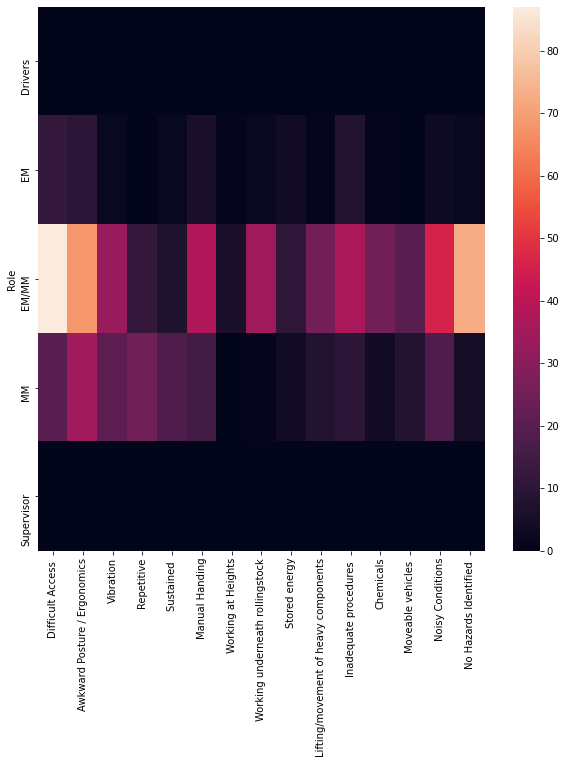

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(distribution);

From the data understanding and visualization, the conclusion of prioritizing mitigating measures for the 'Difficult Access' and 'Ergonomics' will have a significant improvement in the overall safety of performing tasks on the locomostive.